# Projet de Data Science / Deep Learning 

**M2 SE 2024-2025**

- **ADODO DAHOUE Laurence**
- **BARRY Kadiatou**
- **BIGBALA Farida**

# Prédiction des scores d'examen des étudiants en intégrant l'effet du genre.

## Objectif du projet
L'objectif du présent projet est de prédire les résultats des étudiants à l'examen final en utilisant plusieurs variables explicatives. Ces variables comprennent des facteurs tels que les heures d'étude, la qualité de l'enseignement, l'implication des parents, les activités extrascolaires et d'autres éléments susceptibles d'influencer les résultats scolaires. En particulier, le projet se concentre sur l'exploration des **différences de genre** (variable Genre) dans les résultats des examens.

## Description du Dataset
Le jeu de données utilisé pour ce projet est **StudentPerformanceFactors.csv** (Kaggle). Il contient plusieurs caractéristiques qui pourraient avoir un impact sur les résultats des étudiants aux examens. Ces variables comprennent des informations à la fois **quantitatives** (comme le nombre d'heures passées à étudier, la qualité des ressources d'apprentissage, etc.) et **qualitatives** (comme le nombre d'heures passées à étudier par semaine, le niveau d'éducation des parents, mais aussi des facteurs tels que le type d'école fréquentée).

## Description de toutes les Variables du dataset

- **Hours_Studied** : Nombre d'heures passées à étudier par semaine
- **Attendance** : Pourcentage de cours suivis
- **Parental_Involvement** : Niveau d'implication des parents dans l'éducation de l'étudiant (Faible, Moyen, Élevé)
- **Access_to_Resources** : Disponibilité des ressources éducatives (Faible, Moyen, Élevé)
- **Extracurricular_Activities** : Participation aux activités parascolaires (Oui, Non)
- **Sleep_Hours** : Nombre moyen d'heures de sommeil par nuit
- **Previous_Scores** : Scores des examens précédents
- **Motivation_Level** : Niveau de motivation de l'étudiant (Faible, Moyen, Élevé)
- **Internet_Access** : Disponibilité d'un accès à Internet (Oui, Non)
- **Tutoring_Sessions** : Nombre de sessions de tutorat suivies par mois
- **Family_Income** : Niveau de revenu familial (Faible, Moyen, Élevé)
- **Teacher_Quality** : Qualité des enseignants (Faible, Moyen, Élevé)
- **School_Type** : Type d'école fréquentée (Publique, Privée)
- **Peer_Influence** : Influence des pairs sur la performance académique (Positive, Neutre, Négative)
- **Physical_Activity** : Nombre moyen d'heures d'activité physique par semaine
- **Learning_Disabilities** : Présence de troubles d'apprentissage (Oui, Non)
- **Parental_Education_Level** : Niveau d'éducation le plus élevé des parents (Lycée, Collège, Postgrade)
- **Distance_from_Home** : Distance de la maison à l'école (Proche, Modéré, Lointain)
- **Gender** : Genre de l'étudiant (Homme, Femme)
- **Exam_Score** : Score final de l'examen


##  Méthodologie
Afin de prédire le **score de l'examen final** (Exam_Score), plusieurs modèles d'apprentissage automatique seront utilisés et comparés. Les modèles sélectionnés sont les suivants :


1. **Modèles de régression** :
   - ***Linéaire*** : Modèle simple nous servant de base de coparaison pour explorer la relation linéaire entre les variables explicatives et le score à l'examen.
   - ***Ridge et LASSO***

2. **Arbre de décision** : Capable de capturer des interactions complexes entre les variables, cequi nous permettra d'avoir une bonne visibilité sur le processus de décision.
   
3. **Forêt aléatoire** : Un ensemble d'arbres de décision qui réduit l'overfitting et améliore les performances en agrégeant plusieurs arbres

4. **Modèle de réseaux neuronaux (NLM)** : Un modèle d'apprentissage profond pour capturer les relations non linéaires complexes entre les variables.

 - ***MLP (avec une couche cachée)***


## Etapes du projet
1. **Chargement des données et exploration** : Nous commencerons par charger l'ensemble des données et effectuerons une analyse exploratoire afin de mieux comprendre les relations entre les variables
2. **Traitement des données** : Ensuite, nous nettoierons les données, traiterons les variables manquantes et coderons les variables catégorielles
3. **Construction des modèles, interprétation des résultats et conclusion** : Nous terminons par l'implémentation des modèles et la sélection du meilleur modèle.

## 1. Chargement et exploration des données

### Importation des bibliothèques

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install ipython
!pip install scipy
!pip install shap

In [2]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras_tuner import Hyperband
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, SGD
from keras_tuner import Hyperband
from sklearn.model_selection import train_test_split




### 1.1 Chargement du dataset
Avant toute chose, il est nécessaire de charger le dataset dans le notebook

In [140]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


##### Dimensions du dataset (nombre de lignes et de colonnes) :

In [143]:
df.shape

(6607, 20)

In [147]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### 1.2 Vérification des informations générales sur le dataset
Nous avons utilisé le code suivant pour connaître le type de chaque variable

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### 1.3 Distribution des variables
Dans cette section, nous visualisons la distribution de chaque variable dans notre ensemble de données.

#### a. Distribution de la variable cible (Exam_Score)

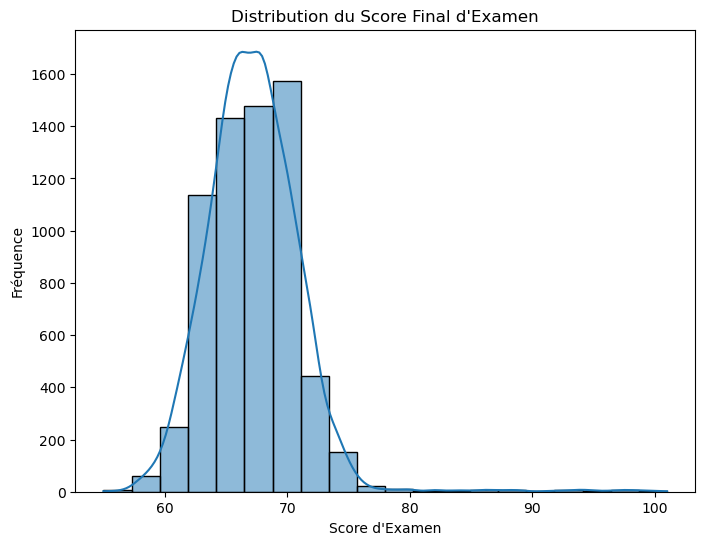

In [154]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], kde=True, bins=20)
plt.title("Distribution du Score Final d'Examen")
plt.xlabel('Score d\'Examen')
plt.ylabel('Fréquence')
plt.show()

## Interprétation : 
Le graphique ci-dessus montre la distribution de la variable cible Exam_Score, correspondant aux notes finales des étudiants, à travers un histogramme enrichi d'une courbe KDE (Kernel Density Estimation). Le graphique révèle une distribution quasi-normale des notes d'examen, avec une forte concentration autour de 70 et de rares extrêmes. Cela indique une population d'étudiants relativement homogène en termes de performances. La courbe KDE, qui utilise un noyau gaussien, confirme cette tendance et fournit une estimation continue de la densité des tests.

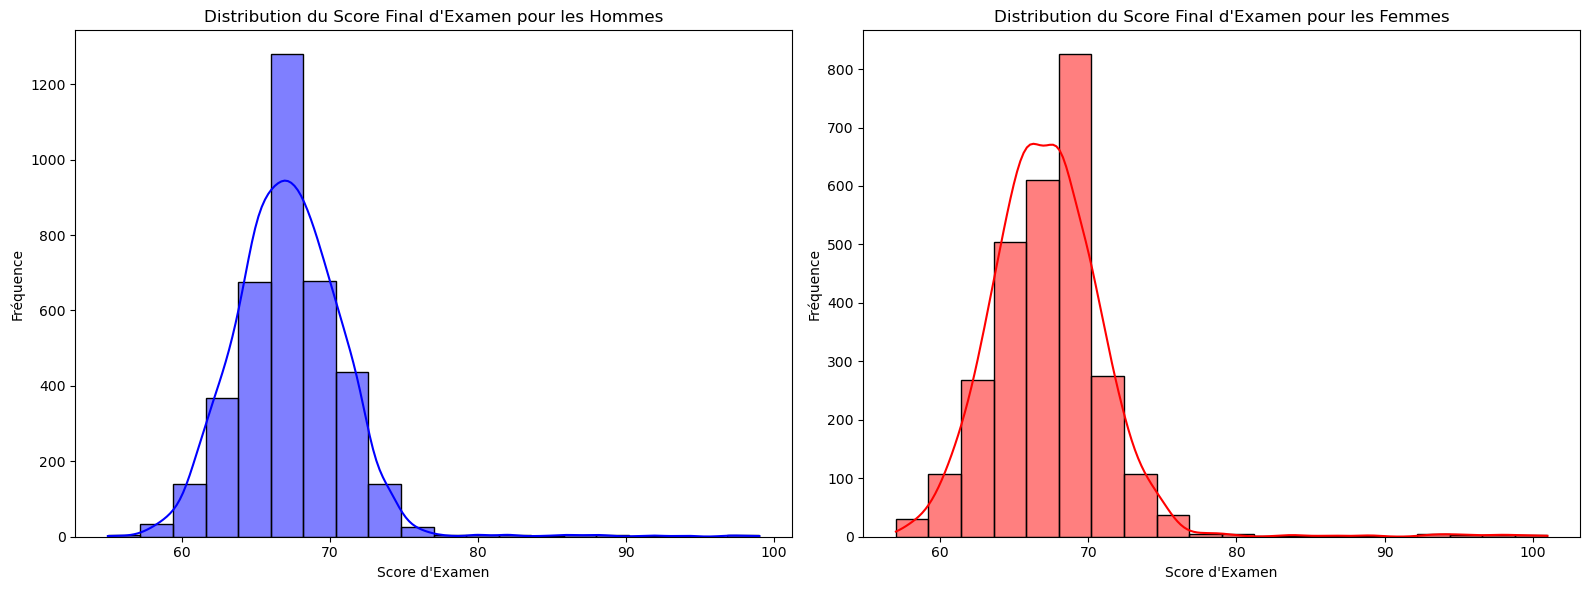

In [157]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1) 
sns.histplot(data=df[df['Gender'] == 'Male'], x='Exam_Score', kde=True, bins=20, color='blue')
plt.title("Distribution du Score Final d'Examen pour les Hommes")
plt.xlabel('Score d\'Examen')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2) 
sns.histplot(data=df[df['Gender'] == 'Female'], x='Exam_Score', kde=True, bins=20, color='red')
plt.title("Distribution du Score Final d'Examen pour les Femmes")
plt.xlabel('Score d\'Examen')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

## Interpretation:

Les graphiques comparent les distributions des résultats des tests entre les hommes et les femmes. Les deux groupes ont des distributions similaires, mais avec des différences dans la dispersion et la fréquence des extrêmes.
La distribution du score final d'examen pour les hommes est étroite, avec un pic principal légèrement inférieur à 70 (autour de 68-69). La majorité des scores sont concentrés dans la fourchette 65-75, et les scores extrêmes (<60 et >80) sont rares. La courbe KDE (bleue) montre une forte densité autour de ce pic. Quant à la distribution des femmes, elle est plus étalée, avec également un pic principal Le pic à 70, qui est plus élevé que celui des hommes, situé légèrement en dessous à 68-69. Les scores masculins sont plus homogènes et concentrés, avec une faible dispersion autour de la moyenne. En revanche, les résultats féminins montrent une distribution plus étendue, marquée par une proportion plus importante de scores très faibles et très élevés.

#### b. Distribution des variables numériques

#### Hours_Studied : Nombre d'heures d'étude

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_7523/4615665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Hours_Studied', palette=['blue', 'red'], inner='quartile')


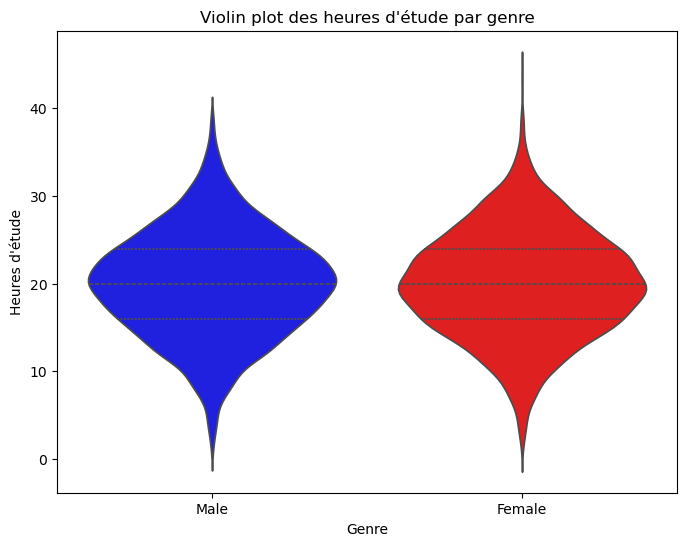

In [34]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Gender', y='Hours_Studied', palette=['blue', 'red'], inner='quartile')
plt.title("Violin plot des heures d'étude par genre")
plt.xlabel("Genre")
plt.ylabel("Heures d'étude")
plt.show()






## Interprétation : 
Ce **violin plot** illustre la distribution des heures d’étude pour les hommes et les femmes, en fournissant des informations sur la densité, la variabilité et les tendances centrales. Les deux genres présentent des distributions symétriques et similaires, avec une densité maximale autour de **20 heures**, ce qui correspond à la médiane pour les deux groupes. La majorité des individus, qu’ils soient hommes ou femmes, consacrent entre **15 et 25 heures** à l’étude, comme le montrent les plages principales de densité.

Cependant, des différences subtiles apparaissent. La distribution des femmes est légèrement plus étalée, reflétant une **variabilité légèrement plus élevée** par rapport à celle des hommes. En particulier, une proportion marginalement plus importante de femmes étudient pendant un grand nombre d’heures (supérieur à 30), ce qui est visible par une queue supérieure plus marquée dans leur distribution. En revanche, les hommes montrent une répartition un peu plus concentrée, avec moins de valeurs extrêmes.

Les deux groupes présentent également des individus aux extrémités des distributions, avec quelques personnes étudiant très peu (moins de 5 heures de temps d'études) ou beaucoup (plus de 35 heures).Le comportements d’étude entre hommes et femmes est globalement similaire, avec de petites variations dans la concentration et la proportion d’heures d’étude élevées chez les femmes.


#### Sleep_Hours : Nombre d'heures de sommeil

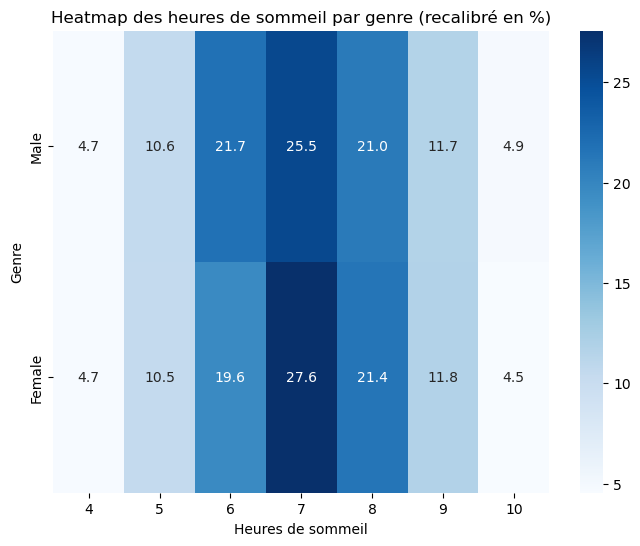

In [38]:
grouped_data = df.groupby(['Gender', 'Sleep_Hours']).size().unstack(fill_value=0)
Male = grouped_data.loc['Male']  
Female = grouped_data.loc['Female'] 
normalized_male = (Male / Male.sum()) * 100
normalized_female = (Female / Female.sum()) * 100
heatmap_data = pd.DataFrame({'Male': normalized_male, 'Female': normalized_female}).fillna(0).T


plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".1f")
plt.title("Heatmap des heures de sommeil par genre (recalibré en %)")
plt.xlabel("Heures de sommeil")
plt.ylabel("Genre")
plt.show()


## Interpretation:
Ce heatmap des heures de sommeil par genre (en pourcentage) représente la proportion d'hommes et de femmes dormant un certain nombre d'heures, normalisée en pourcentage pour chaque groupe. Cela permet une comparaison équitable, indépendamment de la taille de l’échantillon de chaque genre. La majorité des individus dorment entre **6 et 8 heures** pour tous les deux genres confondus, avec un pic à **7 heures, représentant 25,5 % des hommes et 27,6 % des femmes**. Les heures autour de **6, 7 et 8 heures** dominent, regroupant en tout  environ **68 %** des hommes et **68,6 %** des femmes. Les durées extrêmes de sommeil (inférieur à 5 ou supérieur à 9 heures de sommeil) sont rares, avec des proportions similaires pour les deux groupes: **4,7 %** dorment 4 heures, tandis que **4,9 %** des hommes et **4,5 %** des femmes dorment 10 heures.

En comparant les genres, les hommes montrent une distribution plus concentrée autour de 7 heures **(25,5 %) et 6 heures (21,7 %)**, tandis que les femmes ont une proportion légèrement plus élevée à 7 heures **(27,6 %)**. 

#### Previous_Scores par genre

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_7523/154697073.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Previous_Scores', palette=['blue', 'red'])


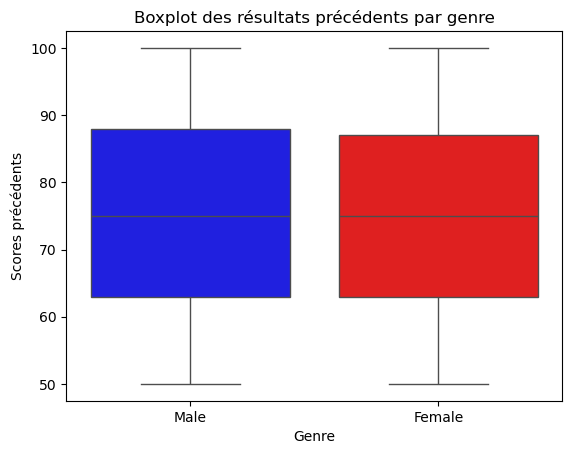

In [42]:
sns.boxplot(data=df, x='Gender', y='Previous_Scores', palette=['blue', 'red'])
plt.title("Boxplot des résultats précédents par genre")
plt.xlabel("Genre")
plt.ylabel("Scores précédents")
plt.show()


## Interpretation:
Ce boxplot montre que les résultats précédents sont quasiment identiques entre les hommes et les femmes : les médianes, les quartiles, et les plages des scores sont similaires.
Aucune différence notable n’est observée dans la distribution ou la variabilité des scores. Cette visualisation nous informe que le genre n’influence pas directement les résultats précédents dans notre échnatillon.


#### Distribution de la variable Tutoring_Sessions par genre

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_7523/3307396843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Tutoring_Sessions', palette=['blue', 'red'], inner='quartile')


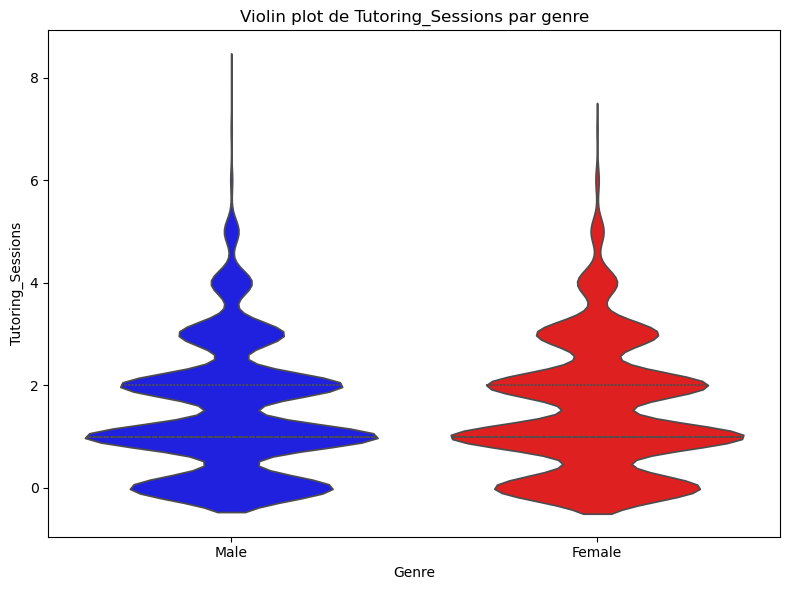

In [46]:
plt.figure(figsize=(8, 6))

sns.violinplot(data=df, x='Gender', y='Tutoring_Sessions', palette=['blue', 'red'], inner='quartile')
plt.title("Violin plot de Tutoring_Sessions par genre")
plt.xlabel("Genre")
plt.ylabel("Tutoring_Sessions")

plt.tight_layout()
plt.show()



## Interprétation
Ce graphique indique que les sessions de tutorat sont globalement faibles et concentrées autour de 1 session pour les hommes comme pour les femmes. Les distributions sont similaires, avec une légère dispersion supplémentaire chez les hommes pour les valeurs extrêmes (nombre élevé de sessions). Cela suggère que le genre n'est pas un facteur déterminant dans le recours aux sessions de tutorat. 

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_7523/735831572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Gender', y='Attendance', palette=['blue', 'red'], alpha=0.7)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warni

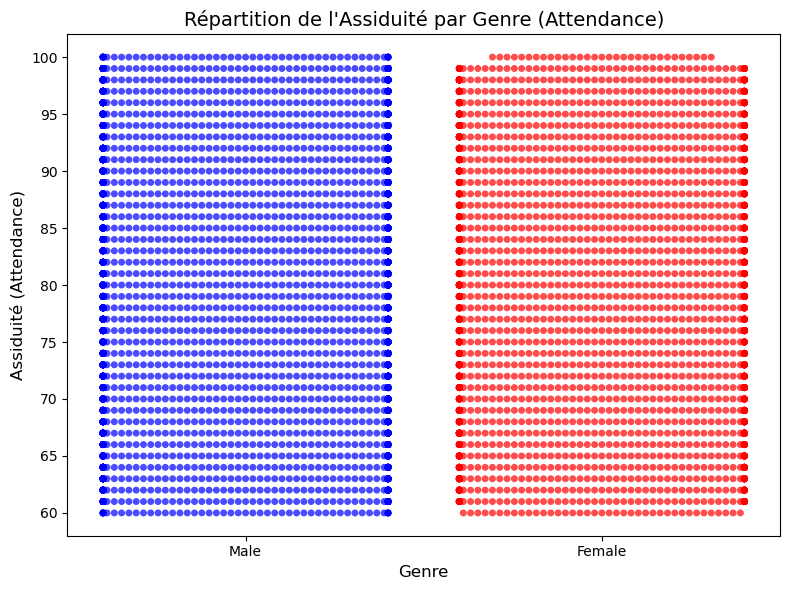

In [159]:
plt.figure(figsize=(8, 6))

sns.swarmplot(data=df, x='Gender', y='Attendance', palette=['blue', 'red'], alpha=0.7)
plt.title("Répartition de l'Assiduité par Genre (Attendance)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Assiduité (Attendance)", fontsize=12)
plt.tight_layout()
plt.show()


## Interpretation

Le graphique illustre la répartition de l'assiduité (Attendance) en fonction du genre (Male et Female). Les données montrent une distribution similaire pour les deux genres, avec des niveaux d'assiduité s'étendant principalement entre 60 et 100. Cependant, on observe que chez les femmes, il y a un manquement de certaines valeurs dans les niveaux d'assiduité les plus fortes (proches de 100), ce qui nous indique une différence dans les comportements entre les genres.


#### c. Distribution de certaines variables catégorielles

Variables catégorielles : 'Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_7523/3694028287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=['blue', 'red'])


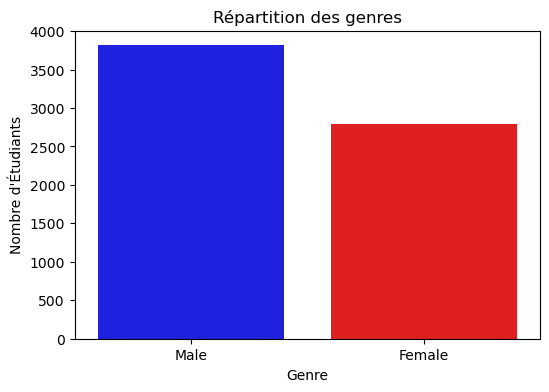

In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette=['blue', 'red'])
plt.title("Répartition des genres")
plt.xlabel("Genre")
plt.ylabel("Nombre d'Étudiants")
plt.show()


## Interpretation

On observe sur ce graphique qu'il y a un plus grand nombre d'hommes que de femmes dans notre échantillon. Cela indique une légère asymétrie dans la composition par genre des participants.


## 2. Prétraitement des données 

### 2.1 Encodage des variables catégorielles 

#### 2.1.1 Variables avec des catégories ordinales 

Les variables Parental_Involvement, Access_to_Resources, Motivation_Level, Family_Income, Teacher_Quality, Parental_Education_Level et Distance_from_Home ont un ordre naturel (par exemple, Low, Medium, High ou Near, Moderate, Far). Nous utilisation donc du Label Encoding, où chaque catégorie reçoit une valeur numérique selon son ordre

In [57]:
ordinal_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
    'Family_Income', 'Teacher_Quality', 'Parental_Education_Level', 
    'Distance_from_Home'
]

categories = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Far', 'Moderate', 'Near']
}

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

for col in ordinal_columns:
    mask = df[col].notna()  
    df.loc[mask, col] = encoder.fit_transform(df.loc[mask, [col]])

ordinal_encodings = {
    col: {cat: i for i, cat in enumerate(categories[col])}
    for col in ordinal_columns
}

#### 2.1.2 Variables binaires (avec seulement deux catégories) :

Nous utilisons le binary Encodinge binaire (0 ou 1) pour les vaiables binaires Extracurricular_Activities, Internet_Access, Learning_Disabilities et Gender.

In [59]:
binary_columns = [
    'Gender', 'Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities'
]

label_encoder = LabelEncoder()
binary_encodings = {}

for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    binary_encodings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

#### 2.1.3 Variables sans ordre clair (non ordinales) :

School_Type et Peer_Influence sont transformées directement dans le DataFrame, remplaçant les valeurs textuelles par des codes numériques.

In [61]:
non_ordinal_columns = ['Peer_Influence', 'School_Type']

One_Hot_Encodings = {}

label_encoder = LabelEncoder()

for col in non_ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])
    One_Hot_Encodings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

#### Dictionnaires des encodages

In [63]:
def encoding_to_dataframe(encoding_data, encoding_type):
    encoding_list = []  
    for col, encoding in encoding_data.items():
        for category, value in encoding.items():
            encoding_list.append({'Column': col, 'Category': category, 'Value': value, 'Encoding Type': encoding_type})

    encoding_df = pd.DataFrame(encoding_list)
    return encoding_df

ordinal_df = encoding_to_dataframe(ordinal_encodings, 'Ordinal Encodings')
binary_df = encoding_to_dataframe(binary_encodings, 'Binary Encodings')
one_hot_df = encoding_to_dataframe(One_Hot_Encodings, 'One-Hot Encodings')  

def display_table(df, title):
    styled_df = df.style.set_table_attributes("style='width: 100%; border: solid 1px black;'").set_caption(title)
    display(styled_df)

display_table(ordinal_df, "Ordinal Encodings")
display_table(binary_df, "Binary Encodings")
display_table(one_hot_df, "One-Hot Encodings")

,Column,Category,Value,Encoding Type
0,Parental_Involvement,Low,0,Ordinal Encodings
1,Parental_Involvement,Medium,1,Ordinal Encodings
2,Parental_Involvement,High,2,Ordinal Encodings
3,Access_to_Resources,Low,0,Ordinal Encodings
4,Access_to_Resources,Medium,1,Ordinal Encodings
5,Access_to_Resources,High,2,Ordinal Encodings
6,Motivation_Level,Low,0,Ordinal Encodings
7,Motivation_Level,Medium,1,Ordinal Encodings
8,Motivation_Level,High,2,Ordinal Encodings
9,Family_Income,Low,0,Ordinal Encodings


,Column,Category,Value,Encoding Type
0,Gender,Female,0,Binary Encodings
1,Gender,Male,1,Binary Encodings
2,Extracurricular_Activities,No,0,Binary Encodings
3,Extracurricular_Activities,Yes,1,Binary Encodings
4,Internet_Access,No,0,Binary Encodings
5,Internet_Access,Yes,1,Binary Encodings
6,Learning_Disabilities,No,0,Binary Encodings
7,Learning_Disabilities,Yes,1,Binary Encodings


,Column,Category,Value,Encoding Type
0,Peer_Influence,Negative,0,One-Hot Encodings
1,Peer_Influence,Neutral,1,One-Hot Encodings
2,Peer_Influence,Positive,2,One-Hot Encodings
3,School_Type,Private,0,One-Hot Encodings
4,School_Type,Public,1,One-Hot Encodings


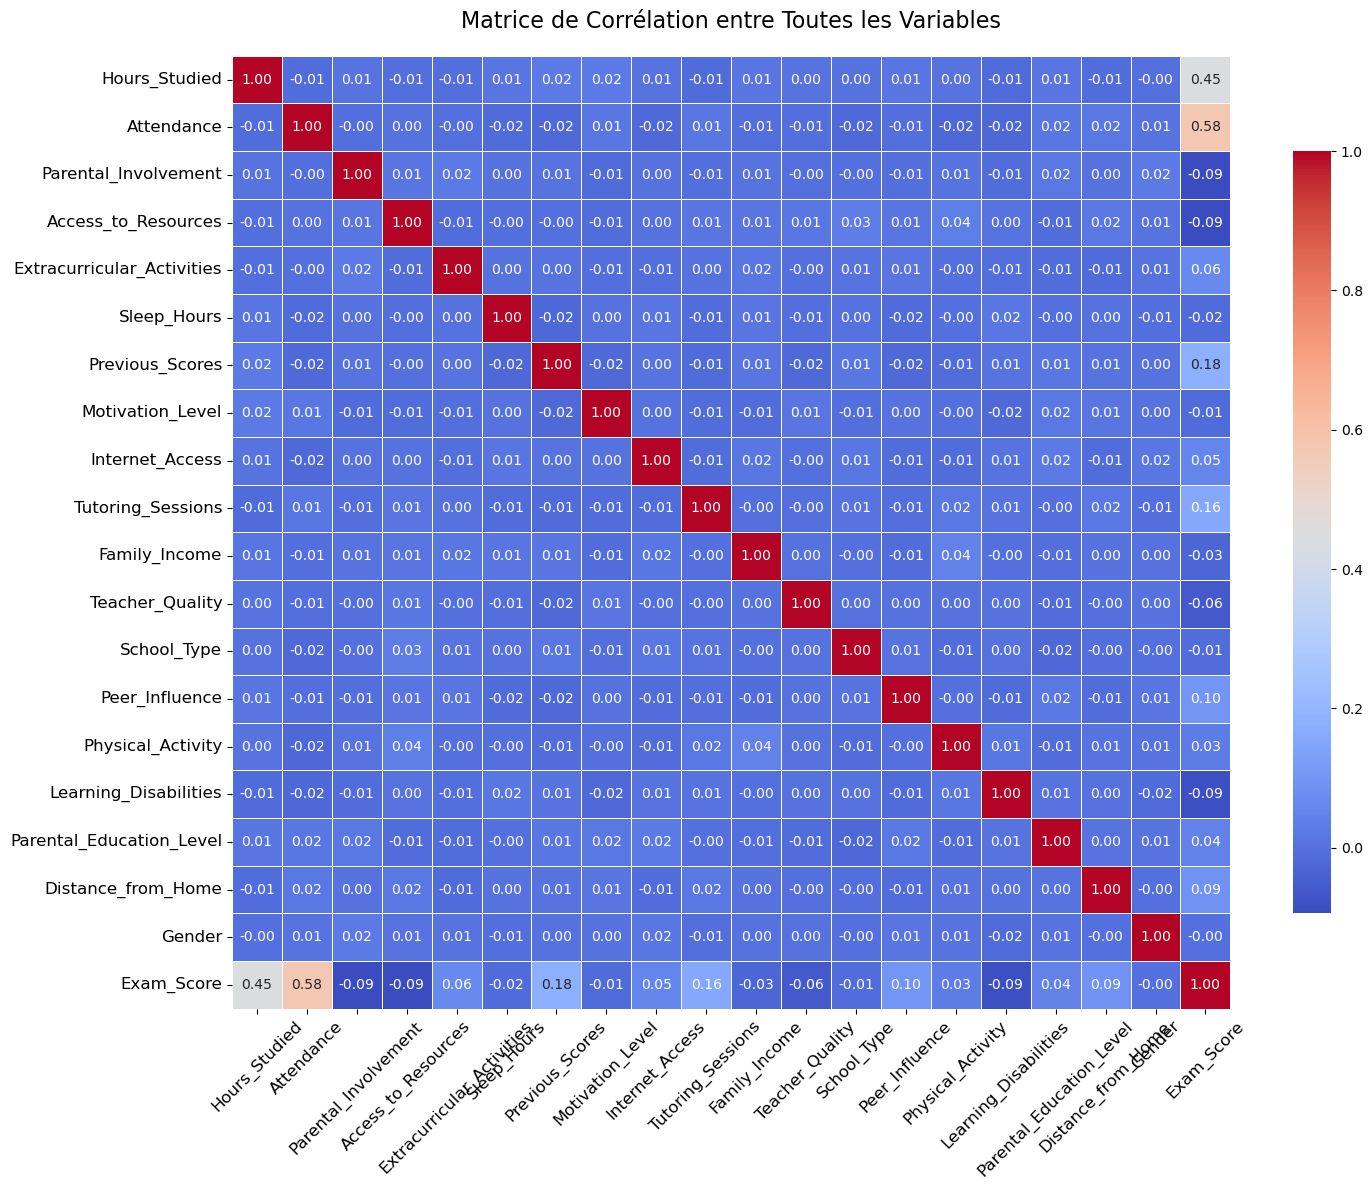

In [64]:
corr_matrix = df.corr(method='pearson')  
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,  
    cmap='coolwarm',  
    fmt='.2f',  
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}  
)
plt.title("Matrice de Corrélation entre Toutes les Variables", fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

## Interpretation de la matrice de correlation

La matrice de corrélation ci dessus met en évidence les relations entre les variables de notre dataset et révèle les facteurs influençant les scores aux examens. Les variables les plus corrélées positivement à **Exam_Score** sont **Attendance** (0.58), le facteur le plus déterminant, suivi par **Hours_Studied** (0.45), indiquant que l’assiduité et le temps d’étude jouent un rôle majeur dans la réussite. Les **scores précédents** (0.18), le **niveau de motivation** (0.16), et les **sessions de tutorat** (0.16) ont également un impact positif mais plus modéré. En revanche, des variables comme **Internet_Access**, **Family_Income**, et **Physical_Activity** présentent des corrélations proches de zéro, ce qui suggère une absence d’impact notable. Les **difficultés d’apprentissage** (-0.09) et les **activités extrascolaires** (-0.09) montrent de légères corrélations négatives, indiquant un effet mineur mais défavorable. Les relations entre les variables indépendantes, comme **Parental_Involvement** et **Access_to_Resources** (0.10), sont faibles et peu significatives.


### 2.3 Vérification des valeurs manquantes


In [74]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### 2.4 Gestion des valeurs manquantes 

In [77]:
rows_with_missing = df.isnull().any(axis=1)
num_rows_with_missing = rows_with_missing.sum()
total_rows = len(df)
percentage_rows_with_missing = (num_rows_with_missing / total_rows) * 100

print(f"Nombre de lignes avec des valeurs manquantes : {num_rows_with_missing}")
print(f"Pourcentage de lignes avec des valeurs manquantes : {percentage_rows_with_missing:.2f}%")

Nombre de lignes avec des valeurs manquantes : 229
Pourcentage de lignes avec des valeurs manquantes : 3.47%


Etant donné que le taux d'individus avec au moins une données manquantes est de 3,47% nous faisons le choix de les supprimer. 

In [80]:
df = df.dropna()

In [82]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [84]:
df.shape

(6378, 20)

Le nombre d'observations passe donc de 6607 à 6378.

In [87]:
display(df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1.0,0.0,0,7,73,1.0,1,0,1.0,2.0,1,2,3,0,1.0,2.0,1,67
1,19,64,1.0,2.0,0,8,59,1.0,1,2,2.0,2.0,1,0,4,0,0.0,1.0,0,61
2,24,98,2.0,2.0,1,7,91,2.0,1,2,2.0,2.0,1,1,4,0,2.0,2.0,1,74
3,29,89,1.0,2.0,1,8,98,2.0,1,1,2.0,2.0,1,0,4,0,1.0,1.0,1,71
4,19,92,2.0,2.0,1,6,65,2.0,1,3,2.0,0.0,1,1,4,0,0.0,2.0,0,70


In [89]:
df.to_csv('StudentPerformanceFactors_Prepared.csv', index=False)
df = pd.read_csv('StudentPerformanceFactors_Prepared.csv')

## 3. Création des modèles 

#### Nous avons fait le choix de séparer des données d'entraînement et de test (80%/20%) et ensuite tester plusieurs modèles afin de choisir le meilleur. Pour les modèles de regressions, nous intégrons des interactions spécifiques tout en conservant les autres variables explicatives dans l'analyse, afin d'avoir une meilleure compréhension de l'effet différencié du genre sur les scores d'examen en relation avec les variables pertinentes.

### a. Modèles de Régression 

### Linéaire



In [95]:

# Variables pertinentes pour les interactions
variables_pertinentes = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions']

# Ajout manuel des interactions avec Genre
for var in variables_pertinentes:
    interaction_name = f"Genre_{var}"
    df[interaction_name] = df['Gender'] * df[var]  # Création de l'interaction manuelle

# Séparation des variables explicatives et cible
X = df.drop(columns=['Exam_Score'])  # Variables explicatives
y = df['Exam_Score']  # Variable cible

# Division en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prédictions
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Évaluation des performances
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
rmse_lr_train = np.sqrt(mse_lr_train)
r2_lr_train = r2_score(y_train, y_pred_lr_train)

mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_test = r2_score(y_test, y_pred_lr_test)

# Affichage des résultats
print("Régression Linéaire avec interactions manuelles - Jeu d'Entraînement")
print(f"MSE (train): {mse_lr_train:.2f}, RMSE (train): {rmse_lr_train:.2f}, R² (train): {r2_lr_train:.2f}")

print("\nRégression Linéaire avec interactions manuelles - Jeu de Test")
print(f"MSE (test): {mse_lr_test:.2f}, RMSE (test): {rmse_lr_test:.2f}, R² (test): {r2_lr_test:.2f}")

# Affichage des coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': lr_model.coef_})
print("\nCoefficients de la régression linéaire :")
print(coefficients)

# Sauvegarde des coefficients dans un fichier Excel
coefficients.to_excel("linear_regression_coefficients_with_manual_interactions.xlsx", index=False)

# Sauvegarde des prédictions dans deux fichiers Excel
train_predictions_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_lr_train": y_pred_lr_train
})

test_predictions_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_lr_test": y_pred_lr_test
})

train_predictions_df.to_excel("linear_regression_train_predictions_with_manual_interactions.xlsx", index=False)
test_predictions_df.to_excel("linear_regression_test_predictions_with_manual_interactions.xlsx", index=False)

print("\nLes prédictions ont été sauvegardées dans 'linear_regression_train_predictions_with_manual_interactions.xlsx' et 'linear_regression_test_predictions_with_manual_interactions.xlsx'.")
print("\nLes coefficients ont été sauvegardés dans 'linear_regression_coefficients_with_manual_interactions.xlsx'.")


Régression Linéaire avec interactions manuelles - Jeu d'Entraînement
MSE (train): 5.46, RMSE (train): 2.34, R² (train): 0.64

Régression Linéaire avec interactions manuelles - Jeu de Test
MSE (test): 5.22, RMSE (test): 2.28, R² (test): 0.66

Coefficients de la régression linéaire :
                      Variable  Coefficient
0                Hours_Studied     0.302758
1                   Attendance     0.201745
2         Parental_Involvement    -0.405303
3          Access_to_Resources    -0.402394
4   Extracurricular_Activities     0.539383
5                  Sleep_Hours    -0.023297
6              Previous_Scores     0.051386
7             Motivation_Level    -0.124629
8              Internet_Access     0.911883
9            Tutoring_Sessions     0.480995
10               Family_Income    -0.162704
11             Teacher_Quality    -0.258983
12                 School_Type     0.007198
13              Peer_Influence     0.513892
14           Physical_Activity     0.181696
15       Lear

### LASSO

In [99]:

# Définir la grille de recherche pour alpha
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.2]}

lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Meilleur modèle
lasso_best = grid_search.best_estimator_

# Prédictions
y_pred_lasso_train = lasso_best.predict(X_train)
y_pred_lasso_test = lasso_best.predict(X_test)

# Évaluation des performances
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
rmse_lasso_train = np.sqrt(mse_lasso_train)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
rmse_lasso_test = np.sqrt(mse_lasso_test)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Afficher les résultats
print("Lasso Regression avec la meilleure valeur de alpha")
print(f"MSE (train): {mse_lasso_train:.2f}, RMSE (train): {rmse_lasso_train:.2f}, R² (train): {r2_lasso_train:.2f}")
print(f"MSE (test): {mse_lasso_test:.2f}, RMSE (test): {rmse_lasso_test:.2f}, R² (test): {r2_lasso_test:.2f}")

# Affichage des coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_best.coef_})
print("\nCoefficients du modèle Lasso :")
print(coefficients)

# Enregistrement des prédictions dans deux DataFrames distincts pour test et entraînement
test_predictions_lasso_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_lasso_test": y_pred_lasso_test
})

train_predictions_lasso_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_lasso_train": y_pred_lasso_train
})

print("\nPrédictions sur le jeu de test :")
print(test_predictions_lasso_df.head())

print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_lasso_df.head())

# Sauvegarde des résultats dans des fichiers Excel
test_predictions_lasso_df.to_excel("lasso_test_predictions.xlsx", index=False)
train_predictions_lasso_df.to_excel("lasso_train_predictions.xlsx", index=False)
print("\nLes prédictions ont été sauvegardées dans 'lasso_test_predictions.xlsx' et 'lasso_train_predictions.xlsx'.")


Lasso Regression avec la meilleure valeur de alpha
MSE (train): 5.47, RMSE (train): 2.34, R² (train): 0.64
MSE (test): 5.22, RMSE (test): 2.29, R² (test): 0.66

Coefficients du modèle Lasso :
                      Variable  Coefficient
0                Hours_Studied     0.296636
1                   Attendance     0.196021
2         Parental_Involvement    -0.391299
3          Access_to_Resources    -0.388987
4   Extracurricular_Activities     0.499575
5                  Sleep_Hours    -0.019418
6              Previous_Scores     0.047690
7             Motivation_Level    -0.140484
8              Internet_Access     0.760800
9            Tutoring_Sessions     0.471577
10               Family_Income    -0.141820
11             Teacher_Quality    -0.248037
12                 School_Type     0.000000
13              Peer_Influence     0.498783
14           Physical_Activity     0.168706
15       Learning_Disabilities    -0.753431
16    Parental_Education_Level     0.150761
17          Dist

### Ridge 

In [101]:

# Définir la grille de recherche pour alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Modèle Ridge
ridge = Ridge()

# Recherche en grille avec validation croisée
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Meilleur modèle
ridge_best = grid_search.best_estimator_

# Prédictions
y_pred_ridge_train = ridge_best.predict(X_train)
y_pred_ridge_test = ridge_best.predict(X_test)

# Évaluation des performances
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
rmse_ridge_train = np.sqrt(mse_ridge_train)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Afficher les résultats
print("Ridge Regression avec la meilleure valeur de alpha")
print(f"MSE (train): {mse_ridge_train:.2f}, RMSE (train): {rmse_ridge_train:.2f}, R² (train): {r2_ridge_train:.2f}")
print(f"MSE (test): {mse_ridge_test:.2f}, RMSE (test): {rmse_ridge_test:.2f}, R² (test): {r2_ridge_test:.2f}")

# Affichage des coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': ridge_best.coef_})
print("\nCoefficients du modèle Ridge :")
print(coefficients)

test_predictions_ridge_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_ridge_test": y_pred_ridge_test
})

train_predictions_ridge_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_ridge_train": y_pred_ridge_train
})

# Affichage des premières lignes des prédictions
print("\nPrédictions sur le jeu de test :")
print(test_predictions_ridge_df.head())

print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_ridge_df.head())

# Sauvegarde des résultats dans des fichiers Excel
test_predictions_ridge_df.to_excel("ridge_test_predictions.xlsx", index=False)
train_predictions_ridge_df.to_excel("ridge_train_predictions.xlsx", index=False)
print("\nLes prédictions ont été sauvegardées dans 'ridge_test_predictions.xlsx' et 'ridge_train_predictions.xlsx'.")


Ridge Regression avec la meilleure valeur de alpha
MSE (train): 5.46, RMSE (train): 2.34, R² (train): 0.64
MSE (test): 5.22, RMSE (test): 2.28, R² (test): 0.66

Coefficients du modèle Ridge :
                      Variable  Coefficient
0                Hours_Studied     0.300521
1                   Attendance     0.199216
2         Parental_Involvement    -0.404628
3          Access_to_Resources    -0.401266
4   Extracurricular_Activities     0.536010
5                  Sleep_Hours    -0.023533
6              Previous_Scores     0.049833
7             Motivation_Level    -0.132195
8              Internet_Access     0.884518
9            Tutoring_Sessions     0.475386
10               Family_Income    -0.161112
11             Teacher_Quality    -0.258668
12                 School_Type     0.007694
13              Peer_Influence     0.512870
14           Physical_Activity     0.180597
15       Learning_Disabilities    -0.842803
16    Parental_Education_Level     0.169829
17          Dist

### b. Arbre de Décision
L'arbre de décision est un modèle non linéaire qui partitionne les données en fonction des caractéristiques pour prédire une valeur continue.

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs hyperparamètres (Decision Tree): {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
Valeurs réelles (Min : 55, Max : 100)
Prédictions (Min : 58.81818181818182, Max : 79.66666666666667)

Performance du modèle optimisé - Training Set
MSE: 4.49, RMSE: 2.12, R²: 0.71

Performance du modèle optimisé - Test Set
MSE: 7.25, RMSE: 2.69, R²: 0.53

Importance des variables :
                      Variable  Importance
1                   Attendance    0.482161
0                Hours_Studied    0.290645
6              Previous_Scores    0.056459
3          Access_to_Resources    0.029641
2         Parental_Involvement    0.029016
9            Tutoring_Sessions    0.024194
10               Family_Income    0.014031
13              Peer_Influence    0.011447
11             Teacher_Quality    0.008569
7             Motivation_Level    0.008152
17          Distance_from_Home    0.007685
21       Genre_Previous_Scores

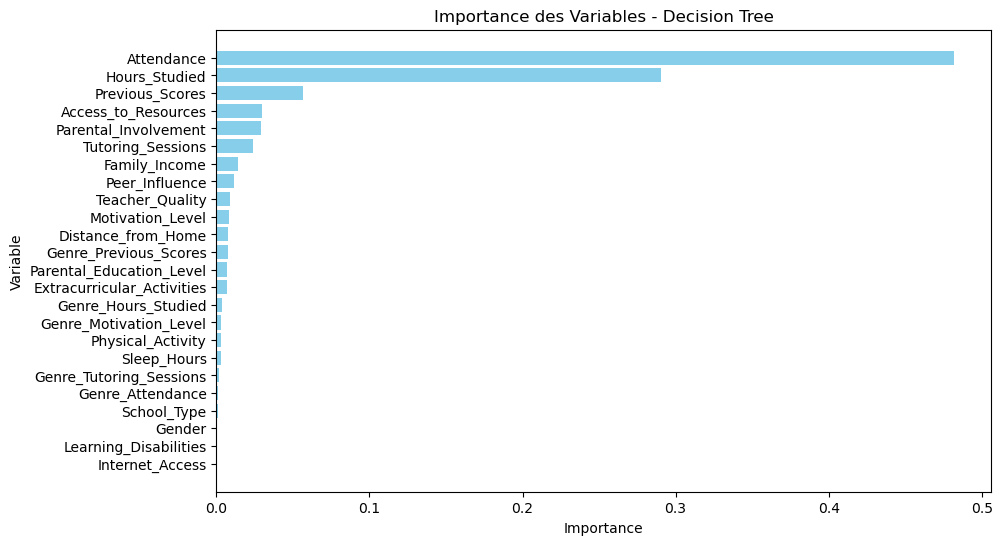

Les importances des variables ont été sauvegardées dans 'decision_tree_feature_importances.xlsx'.

Les prédictions ont été sauvegardées dans 'decision_tree_test_predictions.xlsx' et 'decision_tree_train_predictions.xlsx'.


In [105]:

X = df.drop(columns=['Exam_Score'])  
y = df['Exam_Score']  # Variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 #Définir la grille des hyperparamètres
param_grid = {
    'max_depth': [3, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 5, 10],  
}

#Initialisation du modèle
dt_model = DecisionTreeRegressor(random_state=42)

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params_dt = grid_search.best_params_
print(f"Meilleurs hyperparamètres (Decision Tree): {best_params_dt}")

# Entraîner le modèle avec les meilleurs paramètres
best_dt_model = grid_search.best_estimator_

# Prédictions sur les ensembles d'entraînement et de test
y_pred_dt_train = best_dt_model.predict(X_train)
y_pred_dt_test = best_dt_model.predict(X_test)

# Vérification des plages de prédictions
print(f"Valeurs réelles (Min : {y_test.min()}, Max : {y_test.max()})")
print(f"Prédictions (Min : {y_pred_dt_test.min()}, Max : {y_pred_dt_test.max()})")

# Calcul des métriques
mse_dt_train = mean_squared_error(y_train, y_pred_dt_train)
rmse_dt_train = np.sqrt(mse_dt_train)
r2_dt_train = r2_score(y_train, y_pred_dt_train)

mse_dt_test = mean_squared_error(y_test, y_pred_dt_test)
rmse_dt_test = np.sqrt(mse_dt_test)
r2_dt_test = r2_score(y_test, y_pred_dt_test)

print("\nPerformance du modèle optimisé - Training Set")
print(f"MSE: {mse_dt_train:.2f}, RMSE: {rmse_dt_train:.2f}, R²: {r2_dt_train:.2f}")

print("\nPerformance du modèle optimisé - Test Set")
print(f"MSE: {mse_dt_test:.2f}, RMSE: {rmse_dt_test:.2f}, R²: {r2_dt_test:.2f}")

# Importance des variables
feature_importances_dt = pd.DataFrame({
    'Variable': X.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportance des variables :")
print(feature_importances_dt)

# Visualisation des importances des variables
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_dt['Variable'], feature_importances_dt['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des Variables - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Sauvegarde des résultats dans un fichier Excel
feature_importances_dt.to_excel("decision_tree_feature_importances.xlsx", index=False)
print("Les importances des variables ont été sauvegardées dans 'decision_tree_feature_importances.xlsx'.")

# Sauvegarde des prédictions dans des fichiers Excel
test_predictions_dt_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_dt_test": y_pred_dt_test
})

train_predictions_dt_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_dt_train": y_pred_dt_train
})

test_predictions_dt_df.to_excel("decision_tree_test_predictions.xlsx", index=False)
train_predictions_dt_df.to_excel("decision_tree_train_predictions.xlsx", index=False)

print("\nLes prédictions ont été sauvegardées dans 'decision_tree_test_predictions.xlsx' et 'decision_tree_train_predictions.xlsx'.")


### c. Forêt Aléatoire
La forêt aléatoire est un ensemble d'arbres de décision, où chaque arbre est construit sur un sous-ensemble aléatoire des données. Elle est plus robuste et généralement plus performante qu'un arbre de décision simple.

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Meilleurs hyperparamètres (Random Forest): {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}

Performance du Random Forest Optimisé - Training Set
MSE: 3.31, RMSE: 1.82, R²: 0.78

Performance du Random Forest Optimisé - Test Set
MSE: 5.47, RMSE: 2.34, R²: 0.65

Importance des variables :
                      Variable  Importance
1                   Attendance    0.450675
0                Hours_Studied    0.276150
6              Previous_Scores    0.066035
3          Access_to_Resources    0.030130
9            Tutoring_Sessions    0.027687
2         Parental_Involvement    0.024695
10               Family_Income    0.013990
13              Peer_Influence    0.011837
5                  Sleep_Hours    0.011341
21       Genre_Previous_Scores    0.010613
14           Physical_Activity    0.010044
11             Teacher_Quality    0.008832
16    Parental_Education_Lev

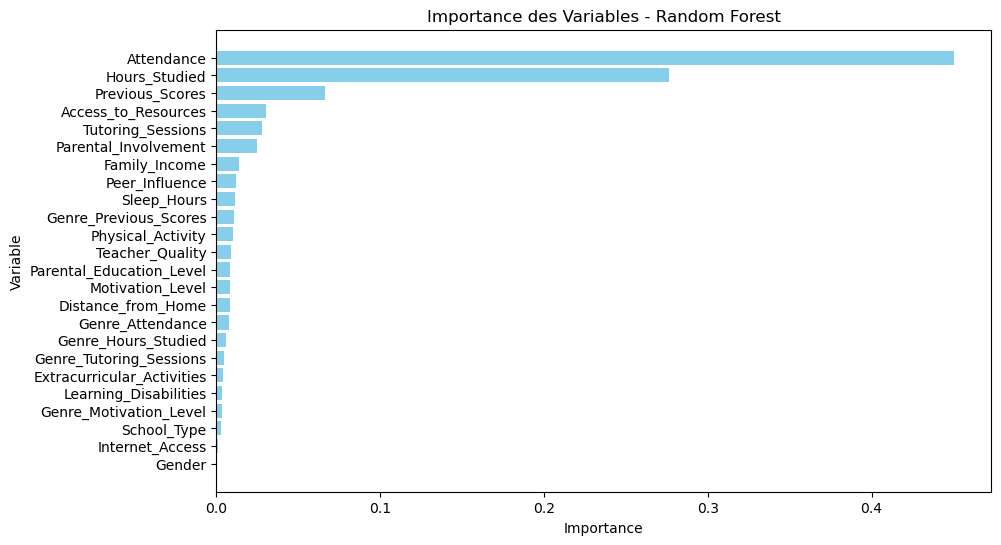


Prédictions sur le jeu de test :
      y_test  y_pred_rf_test
2718      74       74.121258
4275      66       66.847968
4141      70       69.933821
1199      72       70.985704
4546      67       67.134639

Prédictions sur le jeu d'entraînement :
      y_train  y_pred_rf_train
2275       70        70.991642
4603       67        67.089955
2202       62        62.658861
471        63        62.215977
4060       69        69.931653

Les prédictions ont été sauvegardées dans 'rf_test_predictions.xlsx' et 'rf_train_predictions.xlsx'.


In [108]:

X = df.drop(columns=['Exam_Score'])  
y = df['Exam_Score']  
# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 2 : Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],             
    'max_depth': [5, 10, 15, None],             
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 5],              
    'max_features': ['sqrt', 'log2', None]      
}

# Initialisation du modèle
rf_model = RandomForestRegressor(random_state=42)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Étape 3 : Meilleurs hyperparamètres
best_params_rf = grid_search_rf.best_params_
print(f"Meilleurs hyperparamètres (Random Forest): {best_params_rf}")

# Meilleur modèle
best_rf_model = grid_search_rf.best_estimator_

# Étape 4 : Évaluation du modèle optimisé
y_pred_rf_train = best_rf_model.predict(X_train)
y_pred_rf_test = best_rf_model.predict(X_test)

# Calcul des métriques
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
rmse_rf_train = np.sqrt(mse_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)

mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

print("\nPerformance du Random Forest Optimisé - Training Set")
print(f"MSE: {mse_rf_train:.2f}, RMSE: {rmse_rf_train:.2f}, R²: {r2_rf_train:.2f}")

print("\nPerformance du Random Forest Optimisé - Test Set")
print(f"MSE: {mse_rf_test:.2f}, RMSE: {rmse_rf_test:.2f}, R²: {r2_rf_test:.2f}")

# Importance des variables
feature_importances_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportance des variables :")
print(feature_importances_rf)

# Visualisation des importances des variables
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf['Variable'], feature_importances_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des Variables - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Enregistrer les prédictions dans des DataFrames
test_predictions_rf_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_rf_test": y_pred_rf_test
})

train_predictions_rf_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_rf_train": y_pred_rf_train
})

# Affichage des premières lignes des prédictions
print("\nPrédictions sur le jeu de test :")
print(test_predictions_rf_df.head())

print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_rf_df.head())

# Sauvegarde des prédictions dans des fichiers Excel
test_predictions_rf_df.to_excel("rf_test_predictions.xlsx", index=False)
train_predictions_rf_df.to_excel("rf_train_predictions.xlsx", index=False)
print("\nLes prédictions ont été sauvegardées dans 'rf_test_predictions.xlsx' et 'rf_train_predictions.xlsx'.")


### d. Modèles de Réseau de Neurones

### Modèle de réseau (Une seule couche cachée)
Nous utilissons le modèle MLPRegressor de sklearn qui implémente un réseau de neurones multi-couches

In [112]:

# Préparation des données
X = df.drop(columns=['Exam_Score'])  
y = df['Exam_Score'] 

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction pour construire le modèle
def build_model(hp):
    nn_simple_model = Sequential()
    
    # Ajout d'une couche cachée avec un nombre de neurones variable
    nn_simple_model.add(Dense(
        units=hp.Choice('units', [8, 16, 32, 64]),
        activation=hp.Choice('activation', ['relu', 'tanh']),
        input_dim=X_train_scaled.shape[1]
    ))
    
    # Couche de sortie
    nn_simple_model.add(Dense(1, activation='linear')) 
    
    # Compilation du modèle
    nn_simple_model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
        loss='mse',
        metrics=['mae']
    )
    return nn_simple_model

tuner = Hyperband(
    build_model,
    objective='val_loss',  
    max_epochs=100,
    factor=3,
    directory='my_dir',
    project_name='tuning_nn_simple'
)

# Recherche des meilleurs hyperparamètres
tuner.search(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32, verbose=1)

# Meilleurs hyperparamètres
best_hps_nn_simple = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Meilleurs hyperparamètres : {best_hps_nn_simple.values}")

# Entraîner le meilleur modèle
nn_simple_model = tuner.hypermodel.build(best_hps_nn_simple)
history_nn_simple = nn_simple_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=1)

# Évaluation du modèle optimisé
y_pred_nn_simple_train = nn_simple_model.predict(X_train_scaled).flatten()
y_pred_nn_simple_test = nn_simple_model.predict(X_test_scaled).flatten()

# Calcul des métriques
mse_nn_simple_train = mean_squared_error(y_train, y_pred_nn_simple_train)
rmse_nn_simple_train = np.sqrt(mse_nn_simple_train)
r2_nn_simple_train = r2_score(y_train, y_pred_nn_simple_train)

mse_nn_simple_test = mean_squared_error(y_test, y_pred_nn_simple_test)
rmse_nn_simple_test = np.sqrt(mse_nn_simple_test)
r2_nn_simple_test = r2_score(y_test, y_pred_nn_simple_test)

# Affichage des performances
print("\nPerformance du Réseau de Neurones Simple - Training Set")
print(f"MSE: {mse_nn_simple_train:.2f}, RMSE: {rmse_nn_simple_train:.2f}, R²: {r2_nn_simple_train:.2f}")

print("\nPerformance du Réseau de Neurones Simple - Test Set")
print(f"MSE: {mse_nn_simple_test:.2f}, RMSE: {rmse_nn_simple_test:.2f}, R²: {r2_nn_simple_test:.2f}")

# Sauvegarde des prédictions dans des DataFrames
train_predictions_nn_simple_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_nn_simple_train": y_pred_nn_simple_train
})

test_predictions_nn_simple_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_nn_simple_test": y_pred_nn_simple_test
})

# Affichage des premières lignes des prédictions
print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_nn_simple_df.head())

print("\nPrédictions sur le jeu de test :")
print(test_predictions_nn_simple_df.head())

# Sauvegarde dans des fichiers Excel
train_predictions_nn_simple_df.to_excel("nn_simple_train_predictions.xlsx", index=False)
test_predictions_nn_simple_df.to_excel("nn_simple_test_predictions.xlsx", index=False)

print("\nLes prédictions ont été sauvegardées dans 'nn_simple_train_predictions.xlsx' et 'nn_simple_test_predictions.xlsx'.")


Reloading Tuner from my_dir/tuning_nn_simple/tuner0.json
Meilleurs hyperparamètres : {'units': 64, 'activation': 'tanh', 'optimizer': 'sgd', 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}
Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 471.7057 - mae: 9.3630 - val_loss: 6.0439 - val_mae: 1.3288
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 5.3349 - mae: 1.3016 - val_loss: 6.0588 - val_mae: 1.3187
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 6.4752 - mae: 1.3125 - val_loss: 6.5765 - val_mae: 1.3570
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 6.3883 - mae: 1.2892 - val_loss: 5.6716 - val_mae: 1.1769
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 5.9662 - mae: 1.2477 - val_loss: 6.0436 - val_mae: 1.2813
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 5.7089 - mae: 1.2223 - val_loss: 5.7758 - val_mae: 1.2127
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 7.3750 - mae: 1.2926 - val_loss: 5.7337 - val_mae: 1.2253
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 5.6001 - mae: 1.2100 - val_loss: 5.9708 - val_mae: 1.2436
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0

## 4. Comparaison des modèles

Une fois que tous les modèles sont formés, nous pouvons comparer leurs performances en utilisant les mesures MSE (Mean Squared Error) et R² (coefficient de détermination). Ces deux facteurs nous fournissent des indicateurs sur la qualité du modèle. Un MSE plus faible signifie que les prédictions sont proches des valeurs réelles. Un R² plus élevé indique que le modèle explique mieux la variance des données. Le meilleur modèle est donc celui qui a le MSE le plus faible et un le R² le plus élevé.

In [163]:
# Liste des modèles
models = [
    'Régression Linéaire', 
    'Arbre de Décision', 
    'Forêt Aléatoire', 
    'Réseau de Neurones Simple', 
    'Ridge', 
    'LASSO'
]

# MSE pour chaque modèle
mse_scores = [
    mse_lr_test, 
    mse_dt_test, 
    mse_rf_test, 
    mse_nn_simple_test,  
    mse_ridge_test, 
    mse_lasso_test
]

# RMSE pour chaque modèle
rmse_scores = [
    rmse_lr_test, 
    rmse_dt_test, 
    rmse_rf_test, 
    rmse_nn_simple_test, 
    rmse_ridge_test, 
    rmse_lasso_test
]

# R² pour chaque modèle
r2_scores = [
    r2_lr_test, 
    r2_dt_test, 
    r2_rf_test, 
    r2_nn_simple_test,  
    r2_ridge_test, 
    r2_lasso_test
]

# Création du DataFrame pour comparer les modèles
results_df = pd.DataFrame({
    'Modèle': models,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R²': r2_scores
})

print(results_df)

# Sauvegarde des résultats dans un fichier Excel
results_df.to_excel("model_comparison_results.xlsx", index=False)
print("\nLes résultats de comparaison des modèles ont été sauvegardés dans 'model_comparison_results.xlsx'.")


                      Modèle       MSE      RMSE        R²
0        Régression Linéaire  5.219903  2.284711  0.664084
1          Arbre de Décision  7.245792  2.691801  0.533713
2            Forêt Aléatoire  5.473736  2.339602  0.647749
3  Réseau de Neurones Simple  6.065872  2.462899  0.609644
4                      Ridge  5.217953  2.284284  0.664210
5                      LASSO  5.221446  2.285048  0.663985

Les résultats de comparaison des modèles ont été sauvegardés dans 'model_comparison_results.xlsx'.


#### Au vu des résultats, le meilleur modèle est le modèle Ridge, car il présente le MSE le plus faible **(5.217953)** et le R² le plus élevé **(0.664210)** parmi tous les modèles.

## 5. Visualisation et enregistrement des valeurs réellles et prédictes de la variable **Examen Score** pour tous les modèles 

      y_test  y_pred_lr  y_pred_dt  y_pred_rf  y_pred_nn_simple  y_pred_ridge  \
2718      74  73.323332  73.437500  74.121258         72.741829     73.337572   
4275      66  65.449035  67.400000  66.847968         64.331306     65.488761   
4141      70  70.412560  71.818182  69.933821         70.782150     70.423409   
1199      72  70.337471  70.090909  70.985704         71.049454     70.377943   
4546      67  67.274376  67.000000  67.134639         68.264061     67.259674   

      y_pred_lasso  
2718     73.323174  
4275     65.642269  
4141     70.411880  
1199     70.443275  
4546     67.183333  


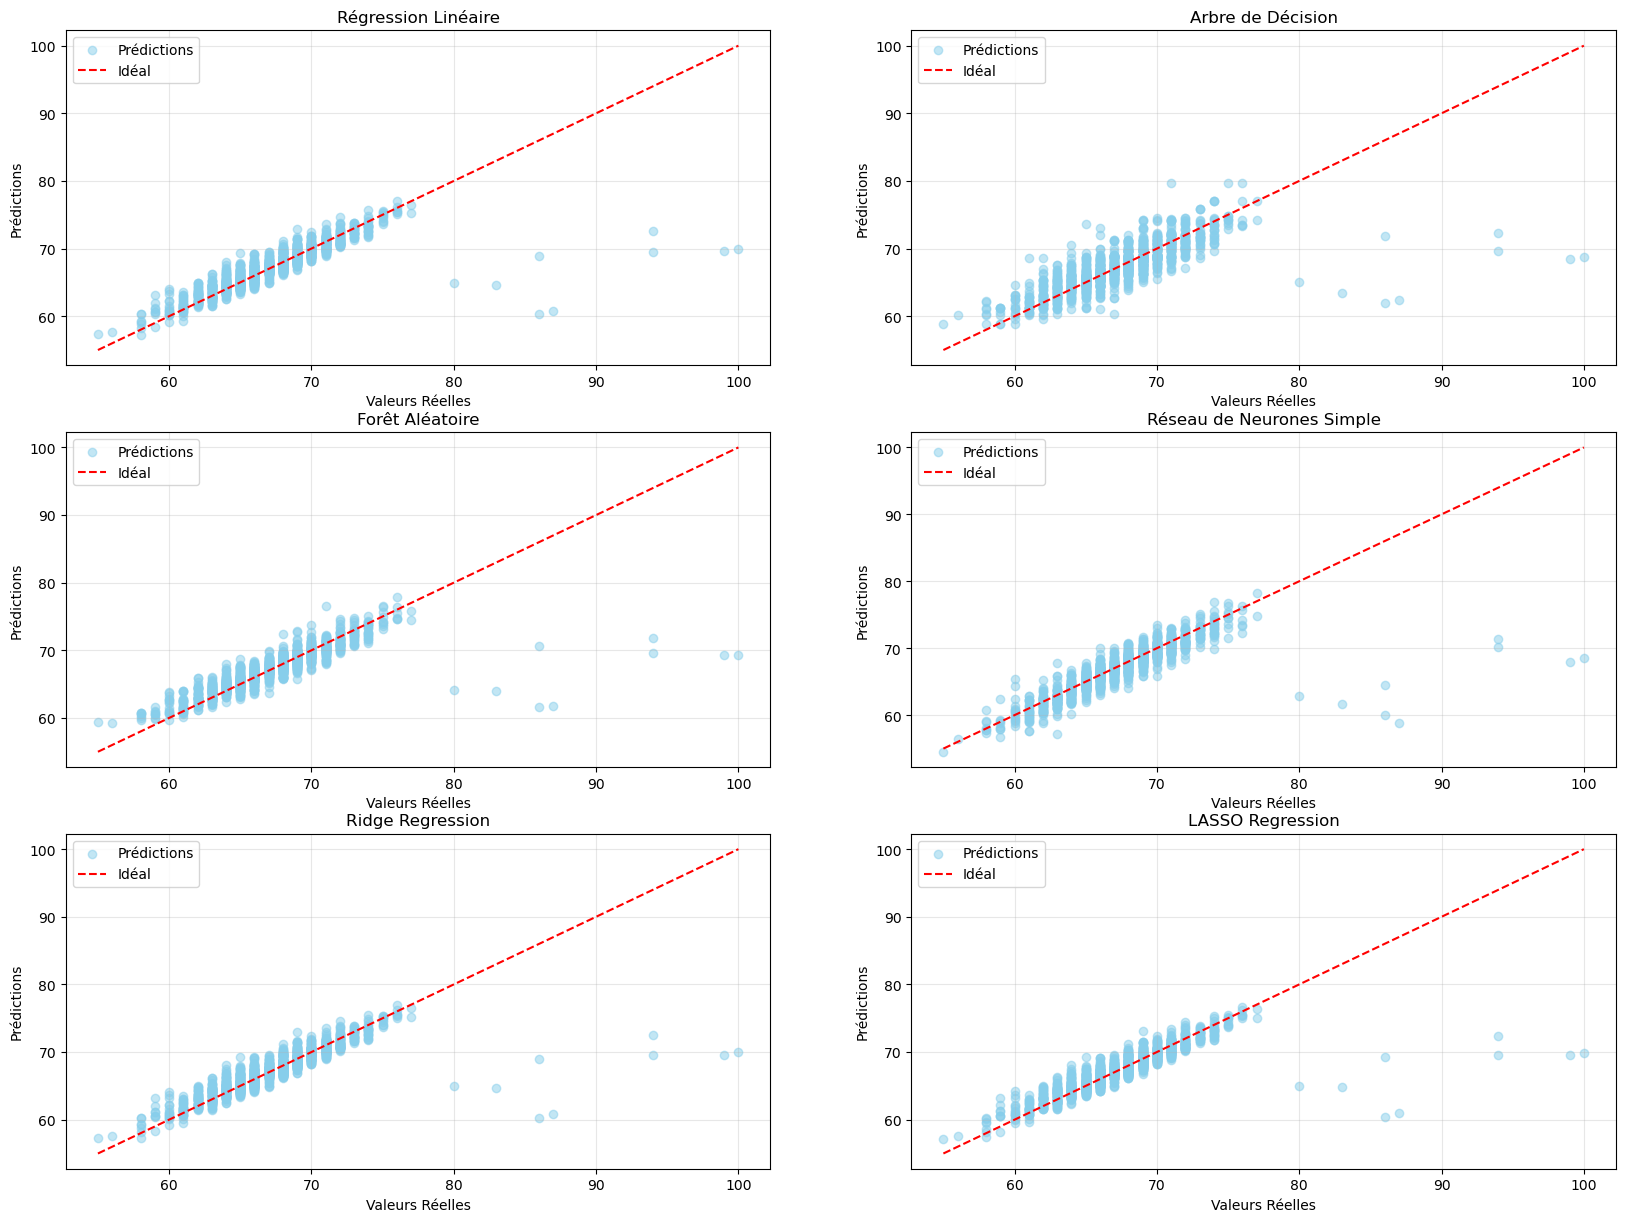

In [176]:

model_predictions = {
    "Régression Linéaire": (y_test, y_pred_lr_test),
    "Arbre de Décision": (y_test, y_pred_dt_test),
    "Forêt Aléatoire": (y_test, y_pred_rf_test),
    "Réseau de Neurones Simple": (y_test, y_pred_nn_simple_test),
    "Ridge Regression": (y_test, y_pred_ridge_test),
    "LASSO Regression": (y_test, y_pred_lasso_test)
}

plt.figure(figsize=(20, 20))

for i, (model_name, (y_true, y_pred)) in enumerate(model_predictions.items(), start=1):
    plt.subplot(4, 2, i)  # Organisation des sous-plots
    plt.scatter(y_true, y_pred, alpha=0.5, label='Prédictions', color='skyblue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Idéal')
    plt.title(f"{model_name}")
    plt.xlabel("Valeurs Réelles")
    plt.ylabel("Prédictions")
    plt.legend()
    plt.grid(alpha=0.3)

# Initialisation d'un DataFrame pour stocker toutes les prédictions
predictions_df = pd.DataFrame({"y_test": y_test})

# Ajout des prédictions pour chaque modèle
predictions_df["y_pred_lr"] = y_pred_lr_test
predictions_df["y_pred_dt"] = y_pred_dt_test
predictions_df["y_pred_rf"] = y_pred_rf_test
predictions_df["y_pred_nn_simple"] = y_pred_nn_simple_test
predictions_df["y_pred_ridge"] = y_pred_ridge_test
predictions_df["y_pred_lasso"] = y_pred_lasso_test

print(predictions_df.head())
plt.show()



## Enregistrement des prédictions de chaque modèle dans une un fichier excel 

In [179]:

def align_lengths(y_train, y_pred_train, y_test, y_pred_test):
    y_train = pd.Series(y_train).reset_index(drop=True)
    y_pred_train = pd.Series(y_pred_train).reset_index(drop=True)
    y_test = pd.Series(y_test).reset_index(drop=True)
    y_pred_test = pd.Series(y_pred_test).reset_index(drop=True)
    return y_train, y_pred_train, y_test, y_pred_test

predictions_dict = {
    "Régression Linéaire": align_lengths(y_train, y_pred_lr_train, y_test, y_pred_lr_test),
    "Arbre de Décision": align_lengths(y_train, y_pred_dt_train, y_test, y_pred_dt_test),
    "Forêt Aléatoire": align_lengths(y_train, y_pred_rf_train, y_test, y_pred_rf_test),
    "Réseau de Neurones Simple": align_lengths(y_train, y_pred_nn_simple_train, y_test, y_pred_nn_simple_test),
    "Ridge Regression": align_lengths(y_train, y_pred_ridge_train, y_test, y_pred_ridge_test),
    "LASSO Regression": align_lengths(y_train, y_pred_lasso_train, y_test, y_pred_lasso_test),
}

# Initialisation du fichier Excel
with pd.ExcelWriter("predictions_all_models.xlsx", engine="xlsxwriter") as writer:
    for model_name, (train_y, train_pred, test_y, test_pred) in predictions_dict.items():
        # Création du DataFrame pour ce modèle
        df = pd.DataFrame({
            "y_train": train_y,
            "y_pred_train": train_pred,
            "y_test": test_y,
            "y_pred_test": test_pred
        })

        # Enregistrement dans une feuille dédiée
        df.to_excel(writer, sheet_name=model_name, index=False)

print("Toutes les prédictions ont été enregistrées dans 'predictions_all_models.xlsx'.")


Toutes les prédictions ont été enregistrées dans 'predictions_all_models.xlsx'.


## 6. Interpretation et conclusion

## Interpretation du meilleur modèle (Ridge)

Le modèle ridge nous a permis d’évaluer les facteurs influençant les scores des étudiants à l’examen final. Les résultats montrent que ce modèle explique environ 66 % de la variance des scores sur le jeu de test, ce qui reflète une capacité raisonnable à prédire les performances académiques à partir des variables explicatives disponibles. Le MSE (Erreur Quadratique Moyenne) sur le jeu de test est de 5.22, tandis que le RMSE (Racine de l’Erreur Quadratique Moyenne) est de 2.28. Cela signifie que l’écart moyen entre les prédictions du modèle et les scores réels est de l’ordre de 2.28 points. Le R² de 0.66 nous indique que le modèle capture une grande partie de la variabilité des scores.

Les coefficients obtenus dans le modèle expriment l'effet moyen de chaque variable explicative sur le score à l’examen, toutes choses égales par ailleurs. Une heure d’étude supplémentaire (Hours_Studied) est associée à une augmentation moyenne de 0.30 points au score final, ce qui met en évidence l’importance du temps consacré à l’étude. De même, une augmentation d’un pourcentage d’assiduité (Attendance) est associée à une hausse moyenne de 0.20 points environ, soulignant l’effet positif de la participation en classe. Les sessions de tutorat (Tutoring_Sessions) jouent également un rôle clé, avec une augmentation moyenne de 0.47 points par session supplémentaire, ce qui montre l’efficacité du soutien pédagogique personnalisé.

Certaines variables, comme l’accès à Internet (Internet_Access), ont également un effet significatif. Les étudiants ayant accès à Internet obtiennent en moyenne 0.88 points de plus, ce qui peut refléter l’importance des ressources numériques pour l’apprentissage.  le niveau d'éducation des parents a un effet positif plus modéré sur le score final de même que les scores passés (Previous_Scores)correspondant avec des hausses respectives de 0.16 et 0.05 points. En revanche, l’implication parentale (Parental_Involvement) a un effet négatif inattendu, avec une diminution moyenne de 0.41 points. 

En ce qui concerne le genre (Gender), être un étudiant masculin est associé à une augmentation moyenne de 0.89 points au score, toutes choses égales par ailleurs. Cette différence de genre met l'accent sur des disparités potentielles dans les performances académiques entre hommes et femmes.

Les interactions avec le genre montrent également des effets faibles mais spécifiques. Par exemple, l’interaction entre le genre et l’assiduité (Genre_Attendance) réduit l’effet global de l’assiduité de 0.002 points par unité. De même, une heure d’étude supplémentaire combinée au genre diminue l’effet global de 0.01 points. Ces interactions suggèrent que l’impact du genre varie selon certaines variables clés, mais ces variations restent faibles en termes d’ampleur.



## Conclusion
le modèle ridge met en évidence les variables les plus influentes sur les scores des examens. Les heures d’étude, l’assiduité, les sessions de tutorat et l’accès à Internet ont des effets positifs significatifs. Le genre joue également un rôle important, bien que modéré par certaines interactions. Certaines relations, comme l’effet négatif de l’implication parentale et de la motivation, nécessitent une analyse approfondie pour mieux comprendre leur signification. Ces résultats nous ont donc permis non seulement de prédire le score final d'examen des étudiants mais aussi d'etudier l'impact du genre sur les score d'examen ainsi que des interactions plus complexes avec cette dernière.